# SPOTIFY MUSIC ANALYSIS USING MACHINE LEARNNG

Abstract:
A machine learning approach to classify music by mood based on song lyrics and many other factors as listed above. This project is about building a music recommendation system for users who want to listen to customized playlists. Such a system can not only be used to brighten up one's mood but also could be used to spread positive mood among people. Spotify data was compiled as part of my project that uses machine learning to classify songs based on audio features associated with it. The collection of data started by outing together playlist details form Spotify.  Spotify web API was used for the collection of the playlist of each category. Song title, and artist names were used to extract low level and high-level Audio features like danceability, energy, liveness, valence, tempo etc. of the songs. Data was also curated using Spotify's audio analysis API. A larger set of songs is part of this data set


Importing the necessary libraries as follows:
1. numpy (adding support for large, multi-dimensional arrays and matrices with a large collection of high-level mathematical functions)
2. pandas(for data manipulation and analysis)
3. matplotlib(produces publication quality figures)
4. sklearn(features various classification algorithm)
5. seaborn(provides a high-level interface for drawing attractive statistical graphics.)

Loading  and dropping the unwanted fields from the dataset to be analyzed

In [154]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
df = pd.read_csv("C:/Users/Chandu Lad/Desktop/spotify.csv")
df = df.drop("Unnamed: 0", axis="columns")

#LISTING THE TYPES OF DATATYPES IN The DATASET

In [155]:
df.get_dtype_counts()

float64    9
int64      5
object     2
dtype: int64

PRINTING THE HEAD OF THE DATA

In [156]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


SEARCHING FOR ANY MISSING VALUES IN DATASET

In [157]:
df.apply(lambda x: sum(x.isnull()),axis=0)

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

#This indicates that there are no Missing Values in the dataset
#Also there is no Bad data in the dataframe.


#SUMMARY STATISTICS OF THE DATASET
#Summary Statistics: Information that gives a quick and simple description of the data that can include mean, median, mode, minimum value, maximum value, range, standard deviation, etc.

In [158]:
df.describe()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


#Listing the column names present in the dataset

In [159]:
df.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence', 'target',
       'song_title', 'artist'],
      dtype='object')

# PLOTTING ALL THE AUDIO FEATURE'S 'MEAN VALUE'

#So here i tried taking the means out of each and every audio feature present in the dataset and through that i tried to analyse is that audio feature contributing well to the likness of the song.

#Mean Value and Distanceplot for DANCEABILITY Feature

Mean value for danceability: 0.6184219137332657


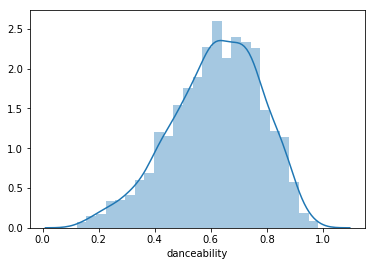

In [160]:
print("Mean value for danceability:", df['danceability'].mean())
sns.distplot(df['danceability'])
plt.show()

#With a mean value of 0.697, it's clear that the majority of the top tracks have a high danceability rating.
#Conclusion: People like to stream songs they can dance to. 

#Mean Value and Distanceplot for ENERGY Feature

Mean value for energy: 0.6815771442736742


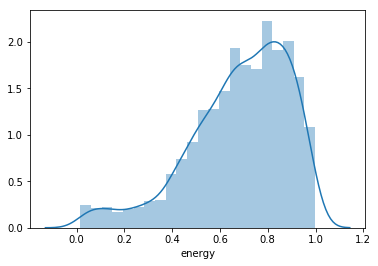

In [161]:
print("Mean value for energy:", df['energy'].mean())
sns.distplot(df['energy'])
plt.show()

Again, people seem like energetic songs more than calm ones (mean of 0.661), although this feature seems to be a bit more evenly distributed than danceability.
#Conclusion: People like energetic songs.

Mapping the numeric values of key to notes

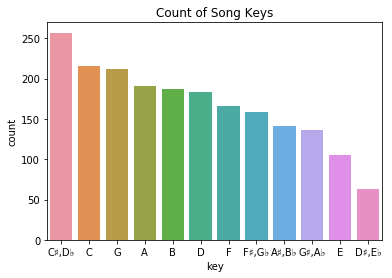

In [162]:
key_mapping = {0.0: 'C', 1.0: 'C♯,D♭', 2.0: 'D', 3.0: 'D♯,E♭', 4.0: 'E', 5.0: 'F', 6.0: 'F♯,G♭', 7.0: 'G', 8.0: 'G♯,A♭', 9.0: 'A', 10.0: 'A♯,B♭', 11.0: 'B'}
df['key'] = df['key'].map(key_mapping)

sns.countplot(x = 'key', data=df, order=df['key'].value_counts().index)
plt.title("Count of Song Keys")
plt.show()

Conclusion: The most common key among top tracks is C♯/D♭

Mean Value and Distanceplot for LOUDNESS Feature

Mean value for loudness: -7.085624194348036


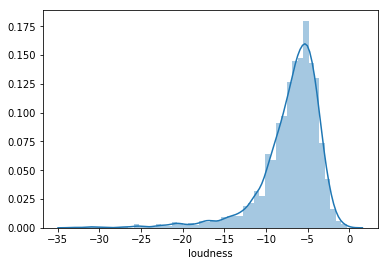

In [163]:
print("Mean value for loudness:", df['loudness'].mean())
sns.distplot(df['loudness'])
plt.show()

Conclusion: Since the value is negative, it shows that people tend to like songs which are not too loud.

Mean Value for MODE Feature with a countplot of the values and mapping the binary value of mode to MAJOR/MINOR

Mean value for mode feature: 0.6122954883490332


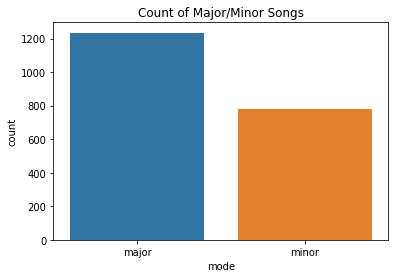

In [164]:
print("Mean value for mode feature:", df['mode'].mean())

#mapping
mode_mapping = {1.0: "major", 0.0: "minor"}
df['mode'] = df['mode'].map(mode_mapping)

#countplot
sns.countplot(x = 'mode', data=df)
plt.title("Count of Major/Minor Songs")
plt.show()

Conclusion: It shows that the songs with mode of major is higher than minor. It means maybe people like happy songs.

Mean Value and Distanceplot for SPEECHINESS Feature

Mean value for speechiness: 0.0926642538423404


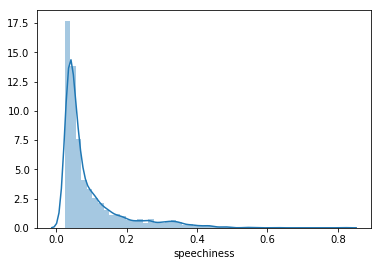

In [166]:
print("Mean value for speechiness:", df['speechiness'].mean())
sns.distplot(df['speechiness'])
plt.show()

Conclusion:The value of mean for speechiness is low i.e only 0.092 which concludes that people prefer songs with more music in it.

Mean Value and Distanceplot for ACOUSTICNESS Feature

Mean value for acousticness: 0.18759003442241004


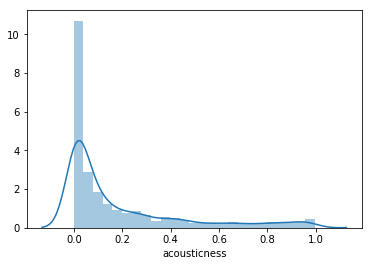

In [167]:
print("Mean value for acousticness:", df['acousticness'].mean())
sns.distplot(df['acousticness'])
plt.show()

Conclusion: People like more of non-acoustic songs than acoustic ones.

Mean Value and Distanceplot for INSTRUMENTALNESS Feature

Mean value for instrumentalness: 0.13328552863163118


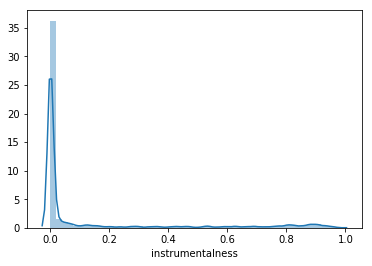

In [168]:
print("Mean value for instrumentalness:", df['instrumentalness'].mean())
sns.distplot(df['instrumentalness'])
plt.show()

Conclusion : The person does not tend to like song which has too much of instruments

Mean Value and Distanceplot for LIVENESS Feature

Mean value for liveness:valen 0.19084402578086268


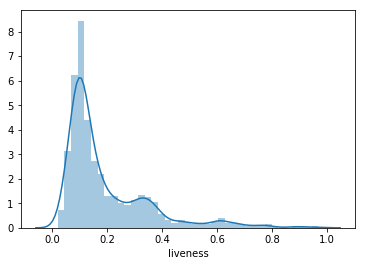

In [169]:
print("Mean value for liveness:valen", df['liveness'].mean())
sns.distplot(df['liveness'])
plt.show()

#Conclusion: The person Does not TEND TO LIKE SONGS RECORDED FROM CONCERTS

Mean Value and Distanceplot for VALENCE Feature

Mean value for valence feature: 0.4968150223103621


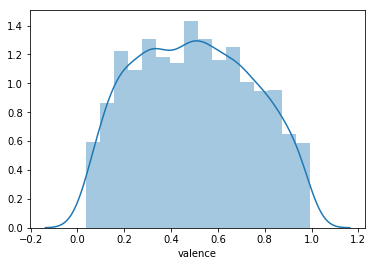

In [170]:
print('Mean value for valence feature:', df['valence'].mean())
sns.distplot(df['valence'])
plt.show()

Conclusion: THERES A BALANCE BETWEEN SAD AND HAPPY SONGS. So the person listens to songs depending on the mood.

Mean Value and Distanceplot for TEMPO Feature

Mean value for tempo feature: 121.60327169062967


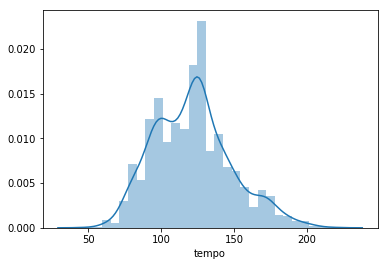

In [171]:
print('Mean value for tempo feature:', df['tempo'].mean())
sns.distplot(df['tempo'])
plt.show()

#Conclusion: FROM THE MEAN IT PROVES THAT PERSON TEND TO LIKE SONGS WITH FAST TEMPO THAN THE SLOW ONES

Mean Value and Distanceplot for DURATION_MS Feature

Mean value for duration_ms feature: 246306.19732275658


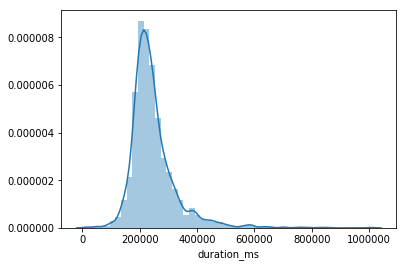

In [172]:
print('Mean value for duration_ms feature:', df['duration_ms'].mean())
sns.distplot(df['duration_ms'])
plt.show()

Conclusion: PERSON TEND TO LIKE SONGS WHICH ARE NOT THAT LONG AND NOT THAT SHORT

Mean Value and Distanceplot for TIME_SIGNATURE Feature

Mean value for time_signature feature: 3.9682697074863658


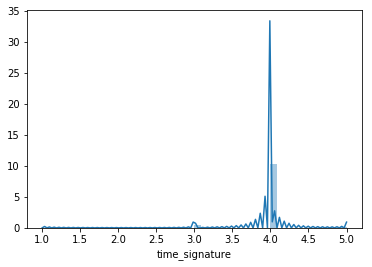

In [173]:
print('Mean value for time_signature feature:', df['time_signature'].mean())
sns.distplot(df['time_signature'])
plt.show()

Conclusion: Person tends to listen to song wich has a time signature of 4/5.

# Correlation HeatMap

So I build this heatmap to see which audio features highly correlate to each other and contribute the likeness of the song
#CMAP: The mapping from data values to color space. If not provided, the default will depend on whether center is set.
#ANNOT: If True, write the data value in each cell. If an array-like with the same shape as data, then use this to annotate the heatmap instead of the raw data

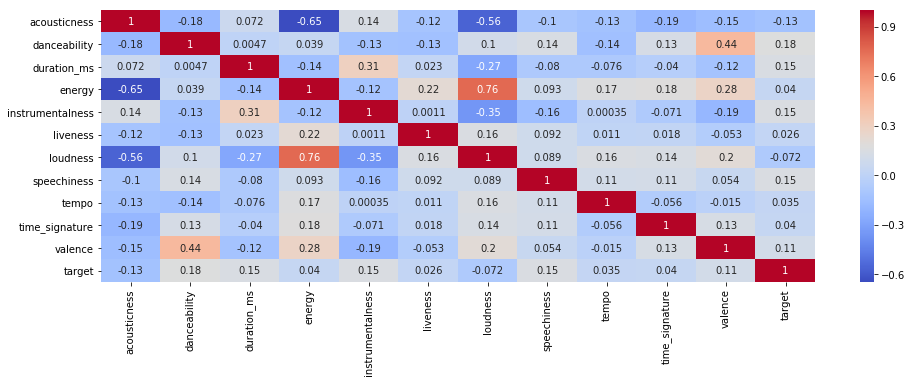

In [96]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()

Conclusion: Heatmap shows that loudness and energy are highly correlated with each other with a value of 0.76

# PAIRPLOT
#This function will create a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column. The diagonal Axes are treated differently, drawing a plot to show the univariate distribution of the data for the variable in that column
#Here I build pairplots with scatterplots for joint relationships and histograms for univariate distributions for the audio features loudness, acousticness, energy, instrumentalness.

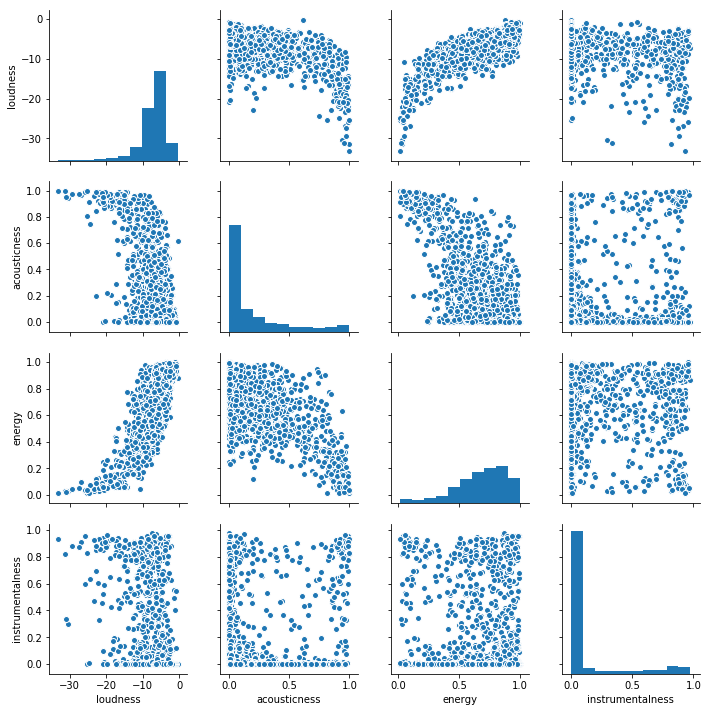

In [98]:
sns.pairplot(df,vars= ['loudness','acousticness','energy','instrumentalness'])

# CORRELATION USING LINEAR REGRESSION
#To play more with the audio features i tried to find correlation between few of the features
#Tried to find correlation between valence and dancebility by training a linear regression model to it and plotted the correlation in scatterplot

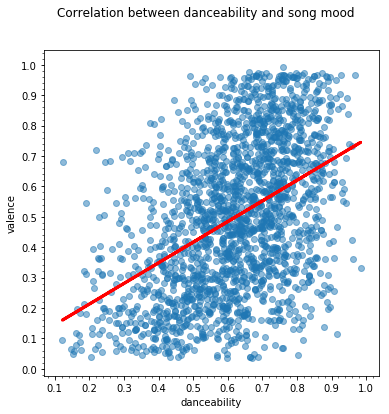

In [175]:
# Tried to find correlation between valence and dancebility by training a linear
x = df["danceability"].values
y = df["valence"].values

#Reshaping the dataset x and y axis
x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

#Training the linear regression model to the dataset
regr = linear_model.LinearRegression()
regr.fit(x, y)

#Plotting the Correlation between danceability and song mood using the 'regr' model trained.
fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and song mood")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("valence")

plt.show()

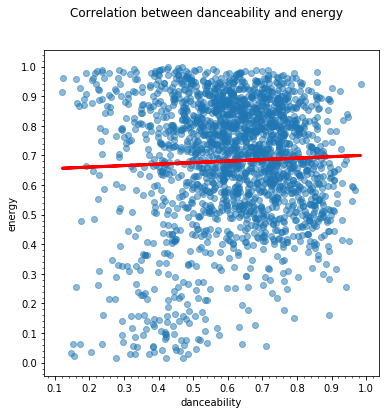

In [179]:
#Same correlation technique to check correlation between danceability and energy
x = df["danceability"].values
y = df["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("energy")

plt.show()

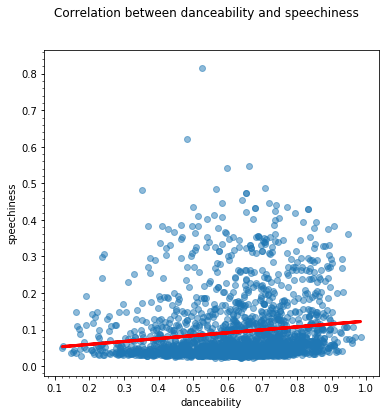

In [182]:
#Same correlation technique to check correlation between danceability and speechiness
x = df["danceability"].values
y = df["speechiness"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between danceability and speechiness")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("danceability")
plt.ylabel("speechiness")

plt.show()

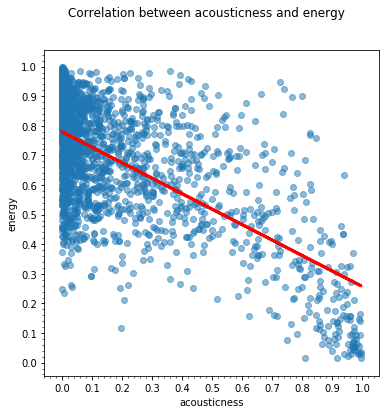

In [183]:
#Same correlation technique to check correlation between acousticness and energy
x = df["acousticness"].values
y = df["energy"].values

x = x.reshape(x.shape[0], 1)
y = y.reshape(y.shape[0], 1)

regr = linear_model.LinearRegression()
regr.fit(x, y)

fig = plt.figure(figsize=(6, 6))
fig.suptitle("Correlation between acousticness and energy")

ax = plt.subplot(1, 1, 1)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, regr.predict(x), color="red", linewidth=3)
plt.xticks(())
plt.yticks(())

ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.02))

ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.02))

plt.xlabel("acousticness")
plt.ylabel("energy")

plt.show()

#From the Plot we build for correlation, the plot of danceability and energy shows the maximum correlation

# Futher illustration of danceability and valence through plots

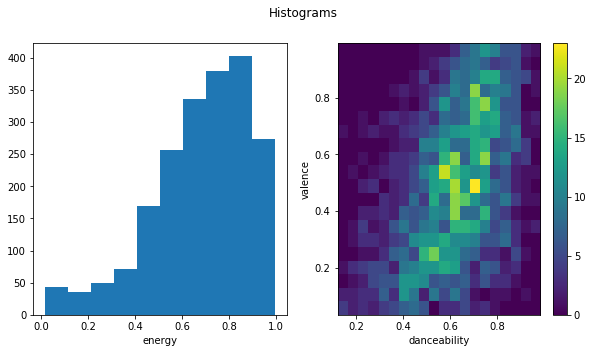

In [184]:
x = "danceability"
y = "valence"

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False, figsize=(10, 5))
fig.suptitle("Histograms")
h = ax2.hist2d(df[x], df[y], bins=20)
ax1.hist(df["energy"])

ax2.set_xlabel(x)
ax2.set_ylabel(y)

ax1.set_xlabel("energy")

plt.colorbar(h[3], ax=ax2)

plt.show()

#The plot on the left illustrates the distribution of songs based on their energy levels, whereas 
#the one on the right is a "heatmap" (histogram in two dimensions) that illustrates the number of songs found at all values of valence and danceability.

# Splitting dataset into random train and test subsets with ratio of 70:30

In [185]:
train, test = train_test_split(df, test_size = 0.30)
print("Training samples: {}; Test samples: {}".format(len(train), len(test)))

Training samples: 1411; Test samples: 606


# SPLITTING THE DATASET BY SENTIMENT

In [186]:
pos_tempo = df[df['target'] == 1]['tempo']
neg_tempo = df[df['target'] == 0]['tempo']
pos_dance = df[df['target'] == 1]['danceability']
neg_dance = df[df['target'] == 0]['danceability']
pos_duration = df[df['target'] == 1]['duration_ms']
neg_duration = df[df['target'] == 0]['duration_ms']
pos_loudness = df[df['target'] == 1]['loudness']
neg_loudness = df[df['target'] == 0]['loudness']
pos_speechiness = df[df['target'] == 1]['speechiness']
neg_speechiness = df[df['target'] == 0]['speechiness']
pos_valence = df[df['target'] == 1]['valence']
neg_valence = df[df['target'] == 0]['valence']
pos_energy = df[df['target'] == 1]['energy']
neg_energy = df[df['target'] == 0]['energy']
pos_acousticness = df[df['target'] == 1]['acousticness']
neg_acousticness = df[df['target'] == 0]['acousticness']
pos_key = df[df['target'] == 1]['key']
neg_key = df[df['target'] == 0]['key']
pos_instrumentalness = df[df['target'] == 1]['instrumentalness']
neg_instrumentalness = df[df['target'] == 0]['instrumentalness']

# PLOTTING SAMPLE HISTOGRAM ON TEMPO LIKE/DISLIKE DISTRIBUTION

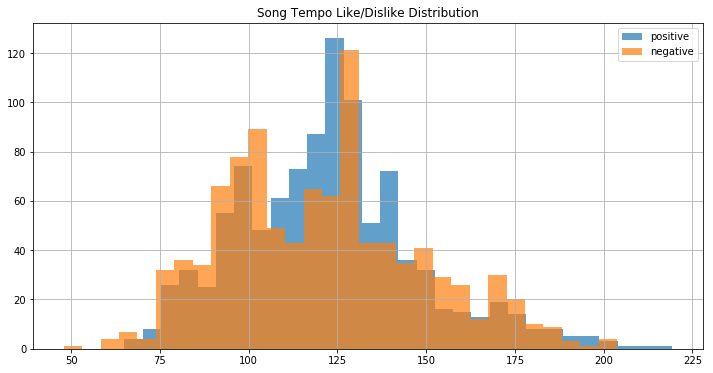

In [187]:
fig = plt.figure(figsize=(12, 6))
plt.title("Song Tempo Like/Dislike Distribution")
pos_tempo.hist(alpha=0.7, bins=30, label='positive')
neg_tempo.hist(alpha=0.7, bins=30, label='negative')
plt.legend(loc="upper right")

#The positive distribution about tempo we can say that person tends to hear songs which have a medium tempo

# Plotting like/dislike distribution for every audio feature in same diagram

C:\Anaconda\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


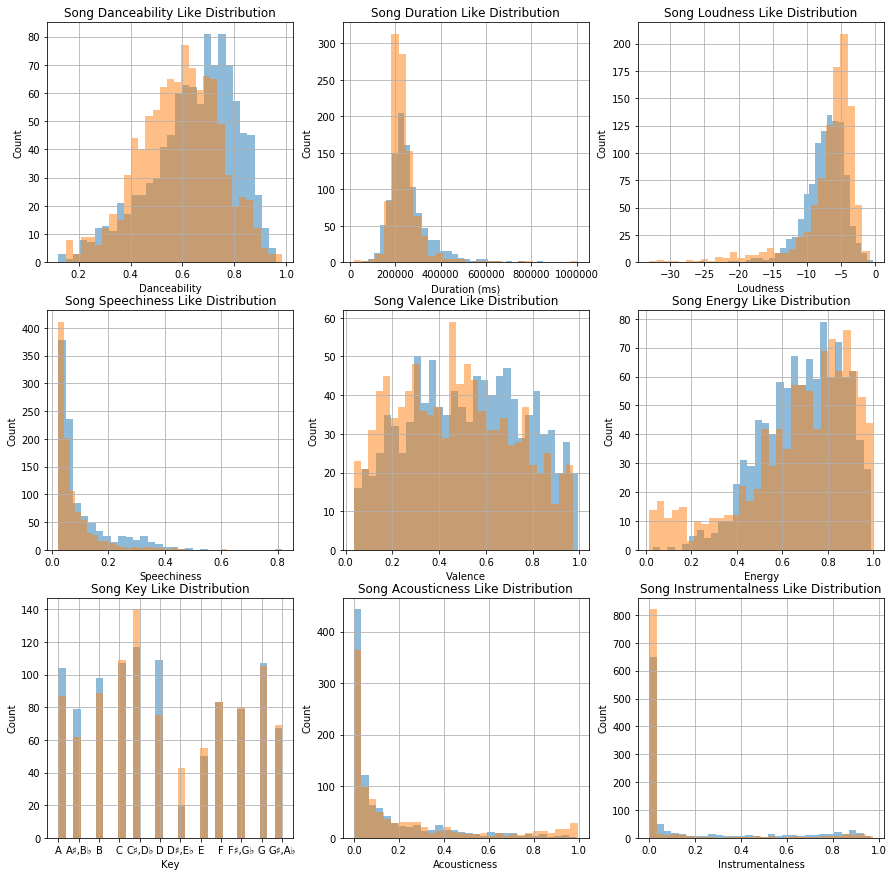

In [188]:
fig2 = plt.figure(figsize=(15, 15))

# Danceability
ax3 = fig2.add_subplot(331)
ax3.set_xlabel('Danceability')
ax3.set_ylabel('Count')
ax3.set_title("Song Danceability Like Distribution")
pos_dance.hist(alpha=0.5, bins=30)
ax4 = fig2.add_subplot(331)
neg_dance.hist(alpha=0.5, bins=30)


# Duration
ax5 = fig2.add_subplot(332)
pos_duration.hist(alpha=0.5, bins=30)
ax5.set_xlabel('Duration (ms)')
ax5.set_ylabel('Count')
ax5.set_title("Song Duration Like Distribution")
ax6 = fig2.add_subplot(332)
neg_duration.hist(alpha=0.5, bins=30)


# Loudness
ax7 = fig2.add_subplot(333)
pos_loudness.hist(alpha=0.5, bins=30)
ax7.set_xlabel('Loudness')
ax7.set_ylabel('Count')
ax7.set_title("Song Loudness Like Distribution")

ax8 = fig2.add_subplot(333)
neg_loudness.hist(alpha=0.5, bins=30)

# Speechiness
ax9 = fig2.add_subplot(334)
pos_speechiness.hist(alpha=0.5, bins=30)
ax9.set_xlabel('Speechiness')
ax9.set_ylabel('Count')
ax9.set_title("Song Speechiness Like Distribution")

ax10 = fig2.add_subplot(334)
neg_speechiness.hist(alpha=0.5, bins=30)

# Valence
ax11 = fig2.add_subplot(335)
pos_valence.hist(alpha=0.5, bins=30)
ax11.set_xlabel('Valence')
ax11.set_ylabel('Count')
ax11.set_title("Song Valence Like Distribution")

ax12 = fig2.add_subplot(335)
neg_valence.hist(alpha=0.5, bins=30)

# Energy
ax13 = fig2.add_subplot(336)
pos_energy.hist(alpha=0.5, bins=30)
ax13.set_xlabel('Energy')
ax13.set_ylabel('Count')
ax13.set_title("Song Energy Like Distribution")

ax14 = fig2.add_subplot(336)
neg_energy.hist(alpha=0.5, bins=30)

# Key
ax15 = fig2.add_subplot(337)
pos_key.hist(alpha=0.5, bins=30)
ax15.set_xlabel('Key')
ax15.set_ylabel('Count')
ax15.set_title("Song Key Like Distribution")

ax15 = fig2.add_subplot(337)
neg_key.hist(alpha=0.5, bins=30)

# Acousticness
ax16 = fig2.add_subplot(338)
pos_acousticness.hist(alpha=0.5, bins=30)
ax16.set_xlabel('Acousticness')
ax16.set_ylabel('Count')
ax16.set_title("Song Acousticness Like Distribution")

ax16 = fig2.add_subplot(338)
neg_acousticness.hist(alpha=0.5, bins=30)

# Instrumentalness
ax17 = fig2.add_subplot(339)
pos_instrumentalness.hist(alpha=0.5, bins=30)
ax17.set_xlabel('Instrumentalness')
ax17.set_ylabel('Count')
ax17.set_title("Song Instrumentalness Like Distribution")

ax17 = fig2.add_subplot(339)
neg_instrumentalness.hist(alpha=0.5, bins=30)

From the figure 
#Danceability --> Person prefers danceable songs as the distribution shows positive for more danceability.
#Song_Duration --> Person prefers song which has duration not too long not short
#Loudness --> Person prefers songs that are not too loud
#Speechiness --> person prefers the song with medium speechiness as distribution shows positive for speechiness from 0.2-0.4
#Valence --> Person prefers happy songs
#Energy --> Person prefers energetic songs
#Key --> person prefers songs which are in D major
#Acousticness --> Person prefers songs which have less acoustic songs
#Instrumentalness --> Person prefers song which has less of music

# Finding the count of artist with their songs

In [189]:
speaker_df = df.groupby('artist').count().reset_index()[['artist', 'target']]
speaker_df.columns = ['artist', 'appearances']
speaker_df = speaker_df.sort_values('appearances', ascending=False)
speaker_df.head(10)

,artist,appearances
356,Drake,16
960,Rick Ross,13
345,Disclosure,12
81,Backstreet Boys,10
1273,WALK THE MOON,10
405,FIDLAR,9
277,Crystal Castles,9
1,*NSYNC,8
409,Fall Out Boy,8
788,Michael Jackson,8


# Plotting barchart for the same appearances

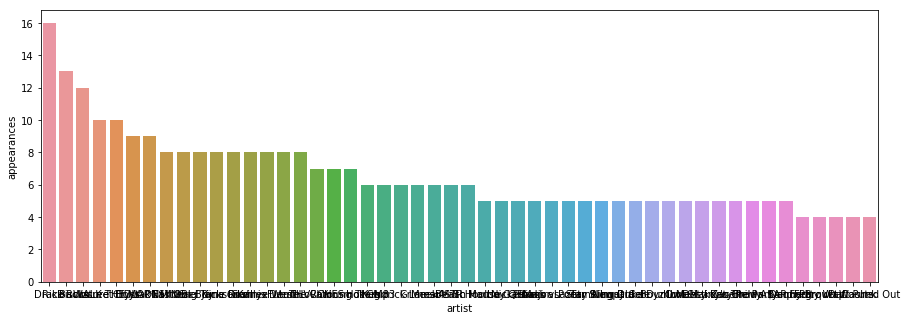

In [190]:
plt.figure(figsize=(15,5))
sns.barplot(x='artist', y='appearances', data=speaker_df.head(50))
plt.show()

#From the appearances Drake's songs are more prefered by the person

#To try more analysis on Spotify data I carried out some analysis on the music data depending upon the region

# Importing the necessary libraries for the other dataset

In [192]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [193]:
data=pd.read_csv("C:/Users/Chandu Lad/Desktop/data.csv")

In [194]:
data.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec


#Listing the Unique region abbreviations present in the dataset

In [195]:
data['Region'].unique()

array(['ec', 'fr', 'ar', 'fi', 'no', 'it', 'lt', 'ph', 'tw', 'nz', 'ee',
       'tr', 'us', 'sv', 'cr', 'de', 'cl', 'jp', 'br', 'hn', 'gt', 'ch',
       'hu', 'ca', 'pe', 'be', 'my', 'dk', 'bo', 'pl', 'at', 'pt', 'se',
       'mx', 'pa', 'uy', 'is', 'es', 'cz', 'ie', 'nl', 'sk', 'co', 'sg',
       'id', 'do', 'lu', 'gb', 'global', 'py', 'au', 'lv', 'gr', 'hk'],
      dtype=object)

#Shakira has higher ratings in Spain than ecuador because she is a Latina artist

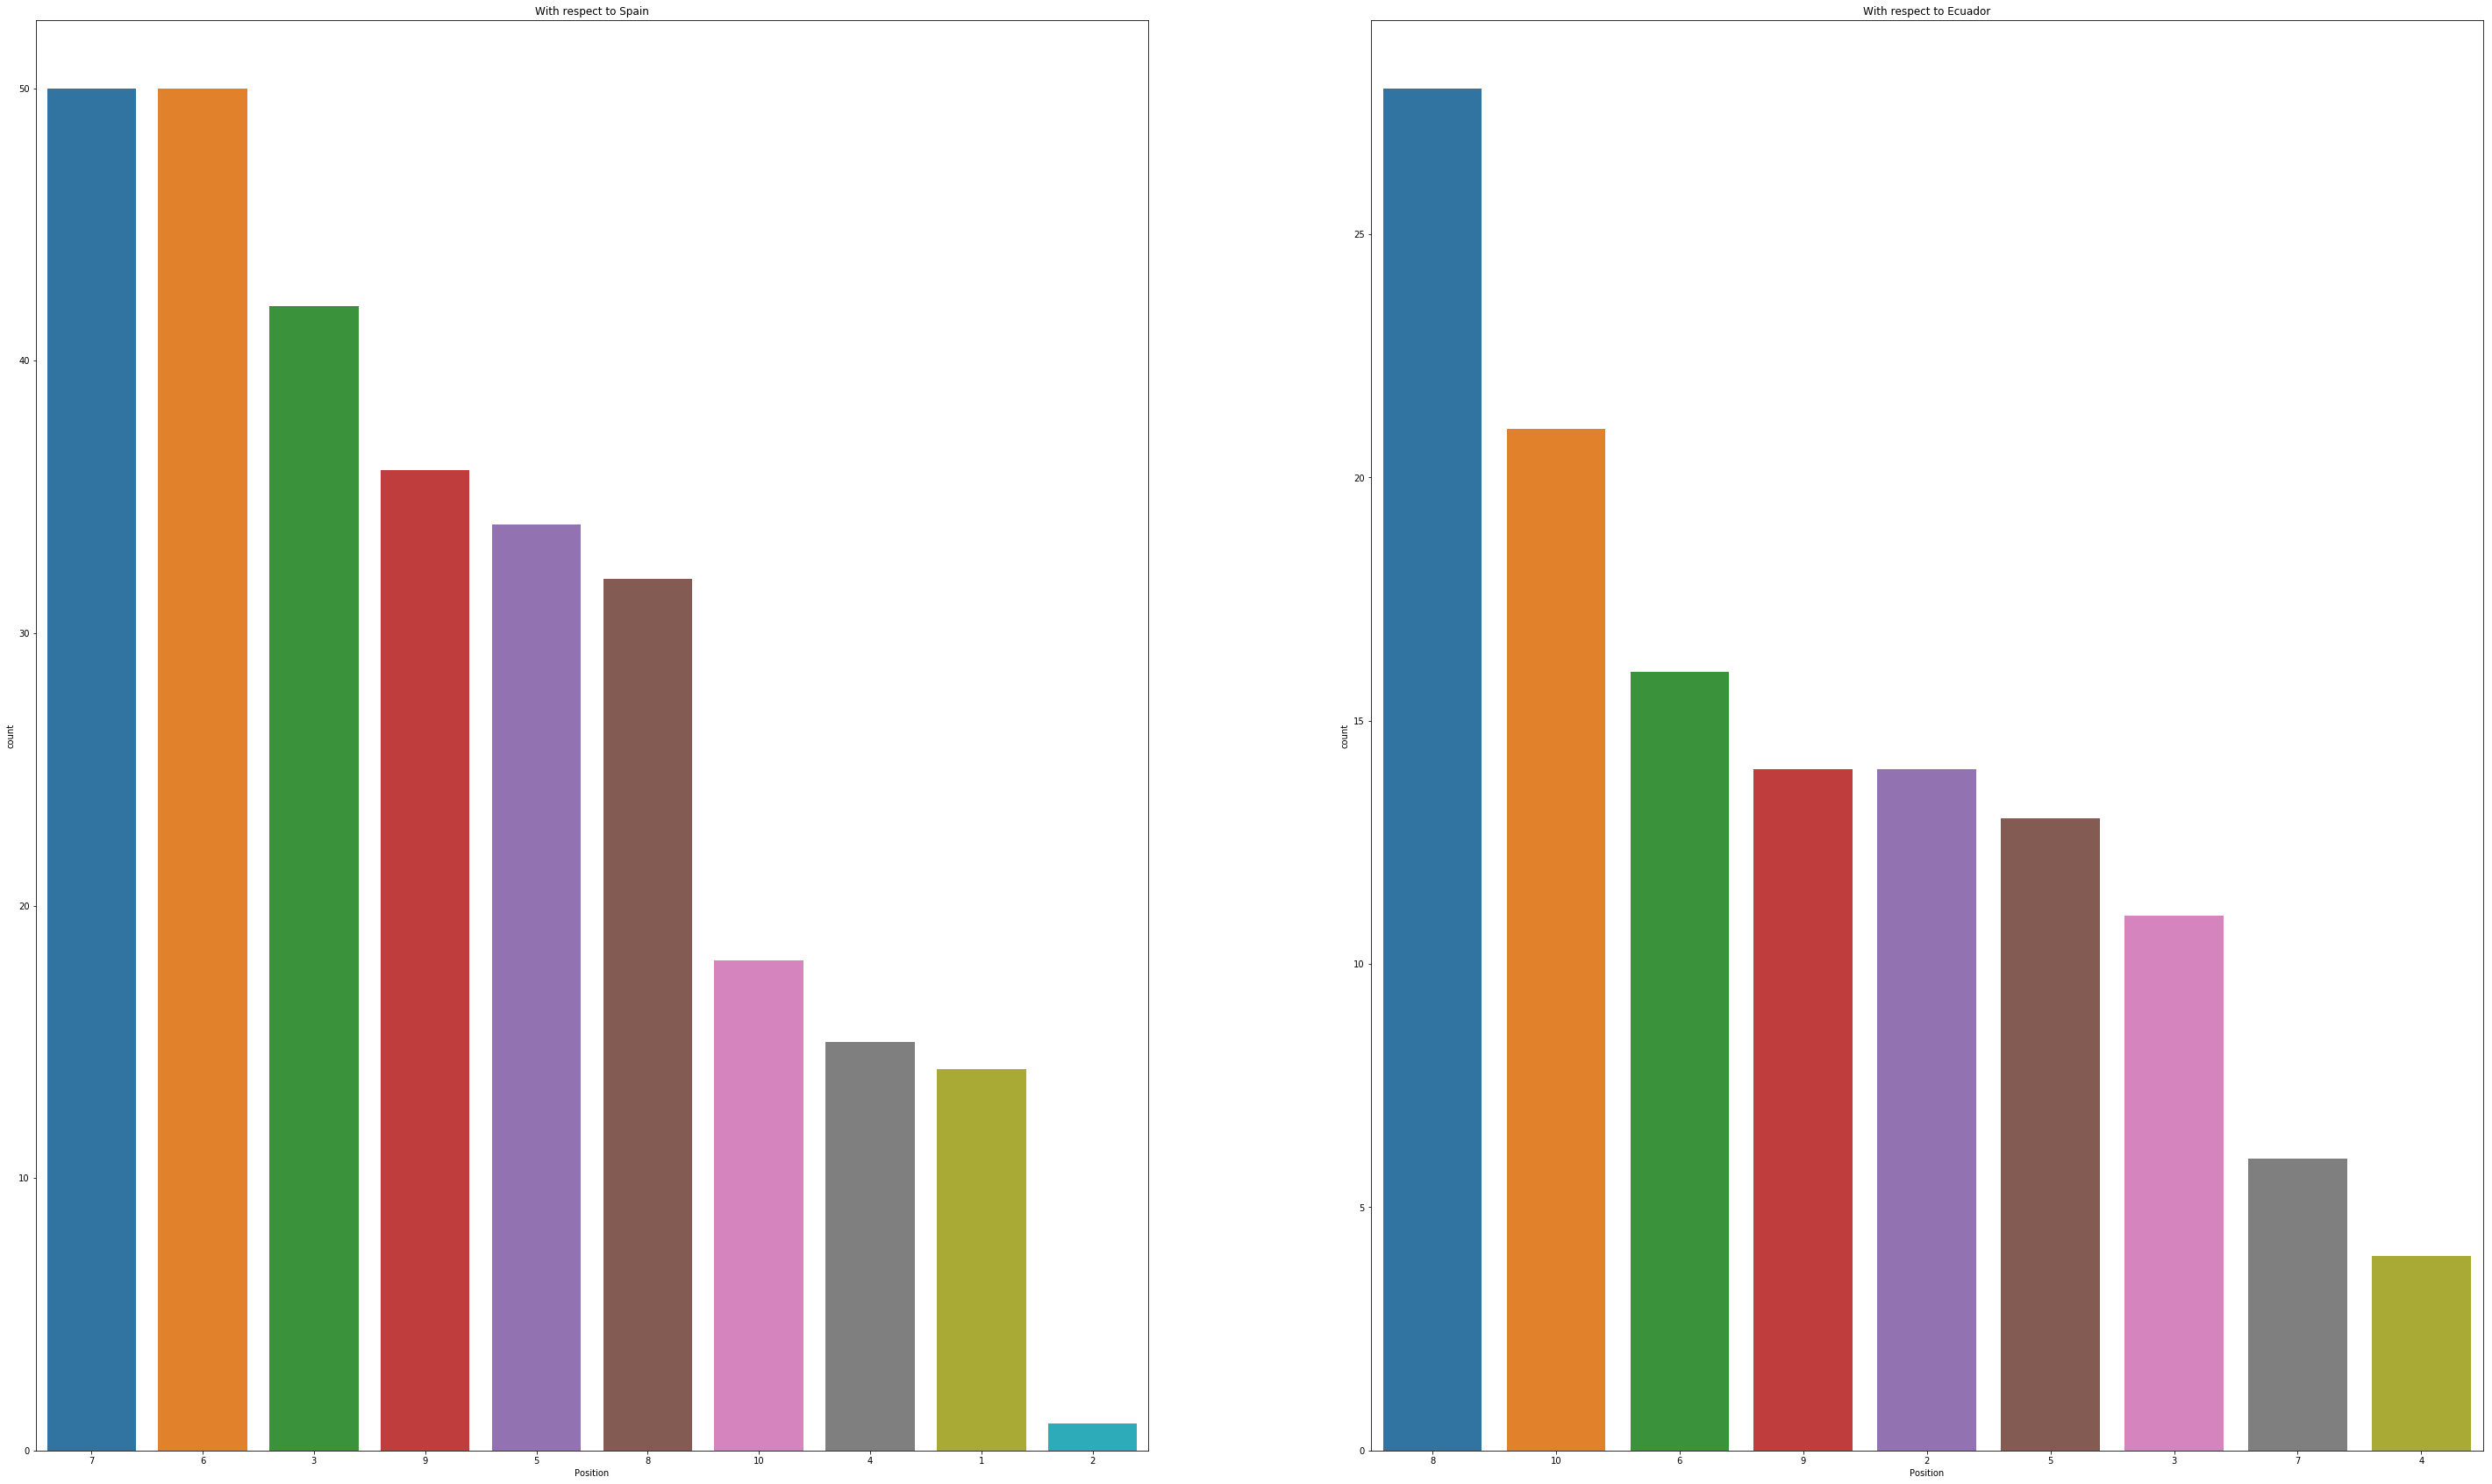

In [196]:
dt_artist = data.loc[data['Artist'] == 'Shakira',:]
dt_loction = dt_artist.loc[dt_artist['Region'] == 'es',:]
da = dt_artist.loc[dt_artist['Region'] == 'ec',:]
fig, ax =plt.subplots(1,2)
dt_l = dt_loction.loc[dt_loction['Position'] < 11,:]
dt_r = da.loc[da['Position'] < 11,:]
sns.countplot(x = 'Position',
              data = dt_l,
              order = dt_l['Position'].value_counts().index,ax=ax[0])
sns.countplot(x = 'Position',
              data = dt_r,
              order = dt_r['Position'].value_counts().index,ax=ax[1])
ax[0].set_title('With respect to Spain')
ax[1].set_title('With respect to Ecuador')

plt.show()


# Finding the top streamed song 

In [197]:
Top_song = data.loc[data['Streams'] == data['Streams'].max() ,:]
Top_song

,Position,Track Name,Artist,Streams,URL,Date,Region
3145443,1,Despacito (Featuring Daddy Yankee),Luis Fonsi,11381520,https://open.spotify.com/track/4aWmUDTfIPGksMN...,2017-05-27,global


# Most Streamed track is Despacito(Featuring Daddy Yankee)

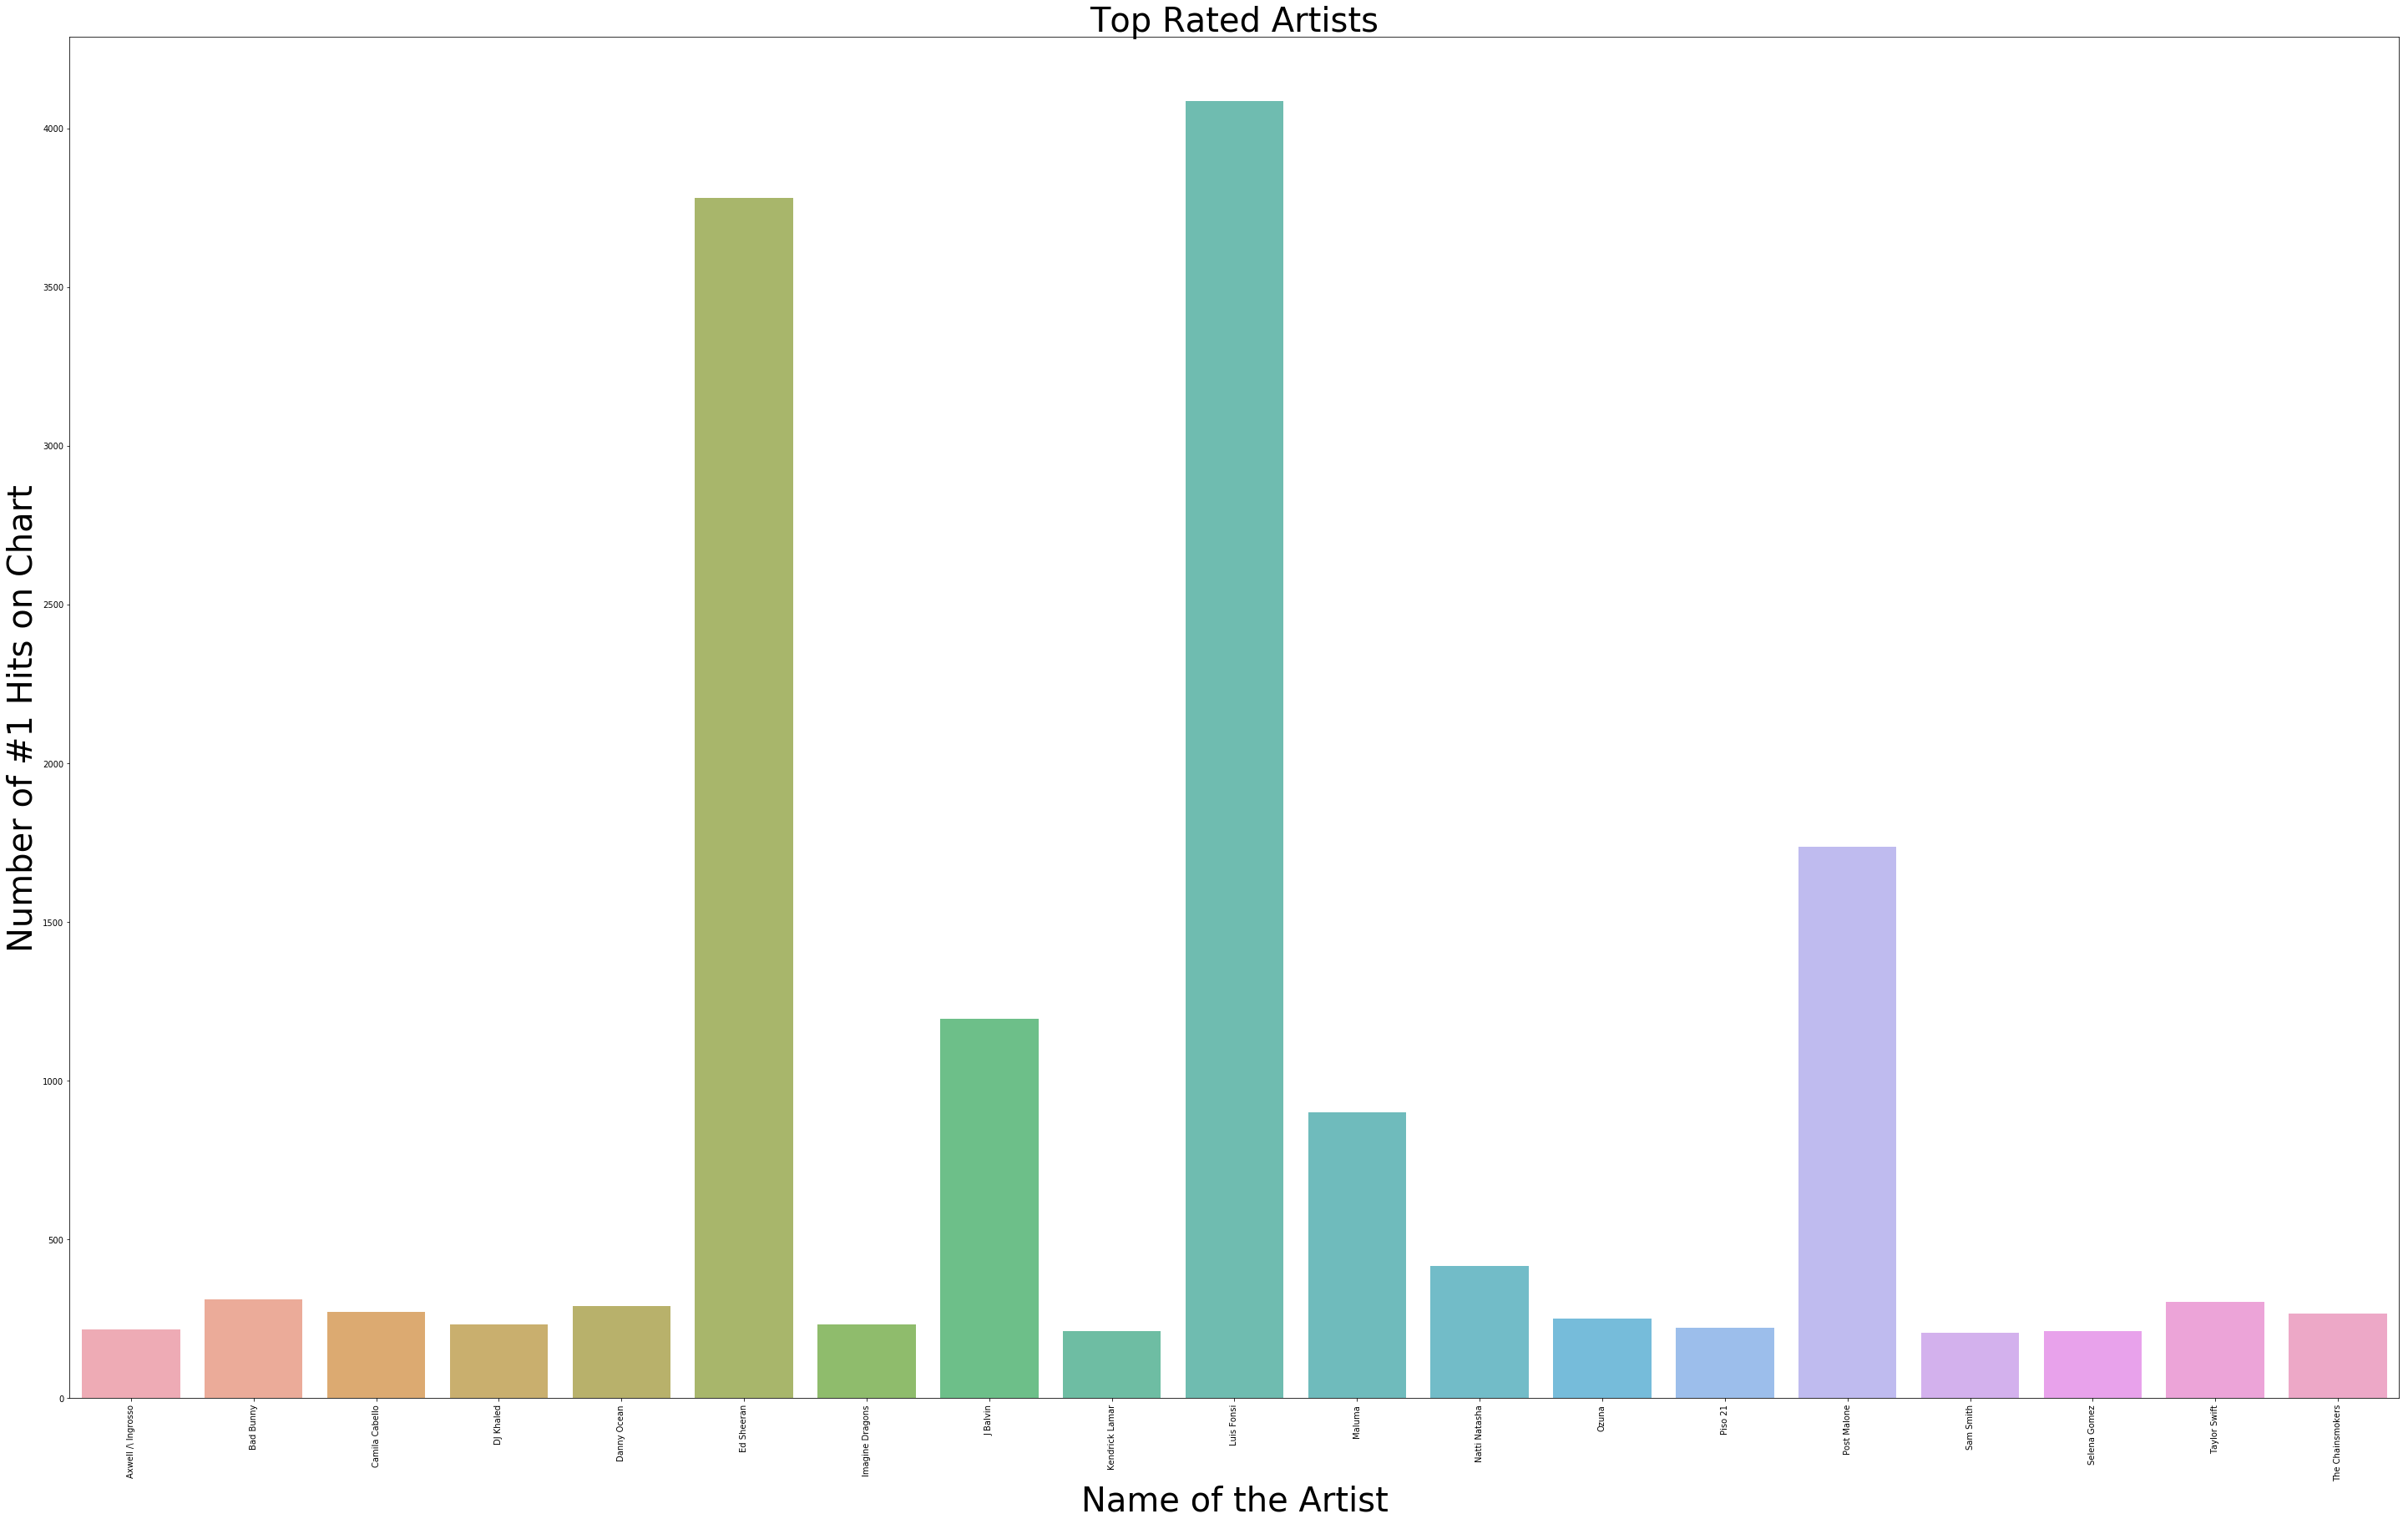

In [198]:
Top = data.loc[data['Position'] == 1,:]
Best = Top.groupby('Artist').size()
Best = Best[(Best.values>200)]
sns.barplot(Best.index, Best.values, alpha=0.8)
plt.xticks(rotation='vertical')
plt.xlabel('Name of the Artist', fontsize=40)
plt.ylabel('Number of #1 Hits on Chart', fontsize=40)
plt.title("Top Rated Artists", fontsize=40)
plt.show()

#Top rated artist is Luis Fonsi with his Hit song Despacito followed by Ed Sheeran for his Single Hit Shape of you*

#Finding the 2nd position in the streamed songs

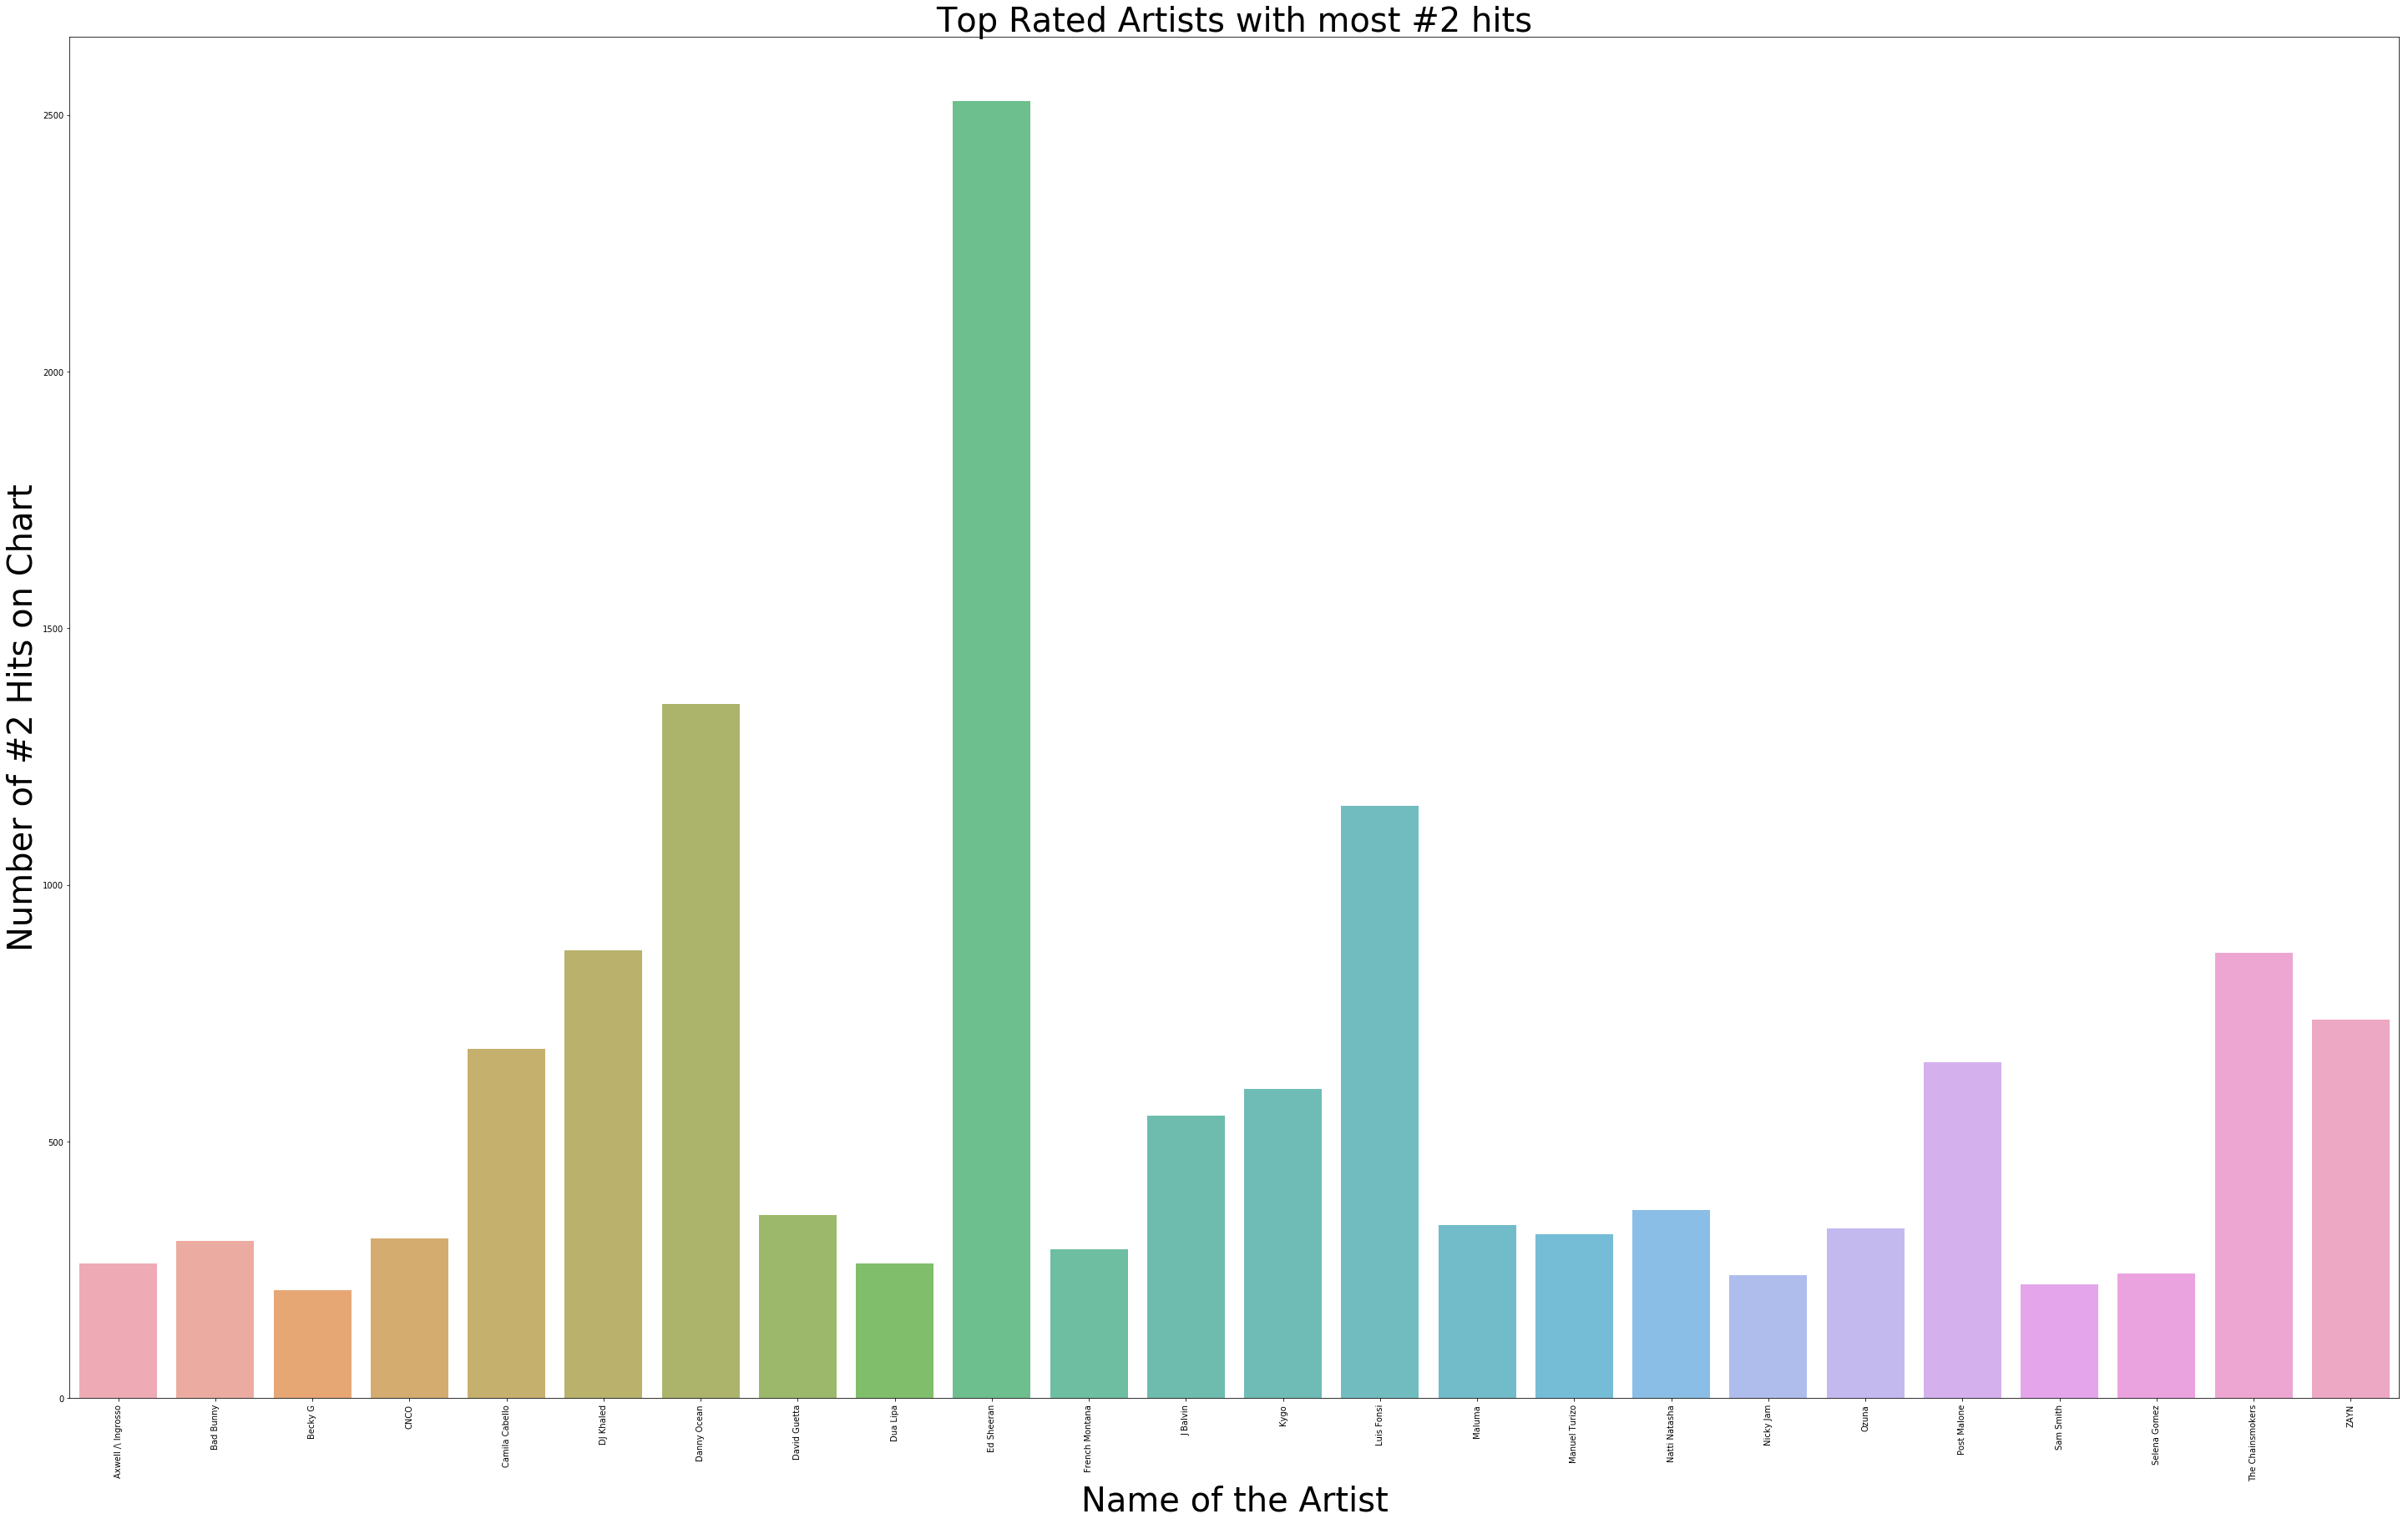

In [199]:
#POSITION - 2
Top = data.loc[data['Position'] == 2,:]
Best = Top.groupby('Artist').size()
Best = Best[(Best.values>200)]
sns.barplot(Best.index, Best.values, alpha=0.8 )
plt.xticks(rotation='vertical')
plt.xlabel('Name of the Artist', fontsize=40)
plt.ylabel('Number of #2 Hits on Chart', fontsize=40)
plt.title("Top Rated Artists with most #2 hits", fontsize=40)
plt.show()

Plotting the Top song "Ed Sheeran- Shape of You" according to regions

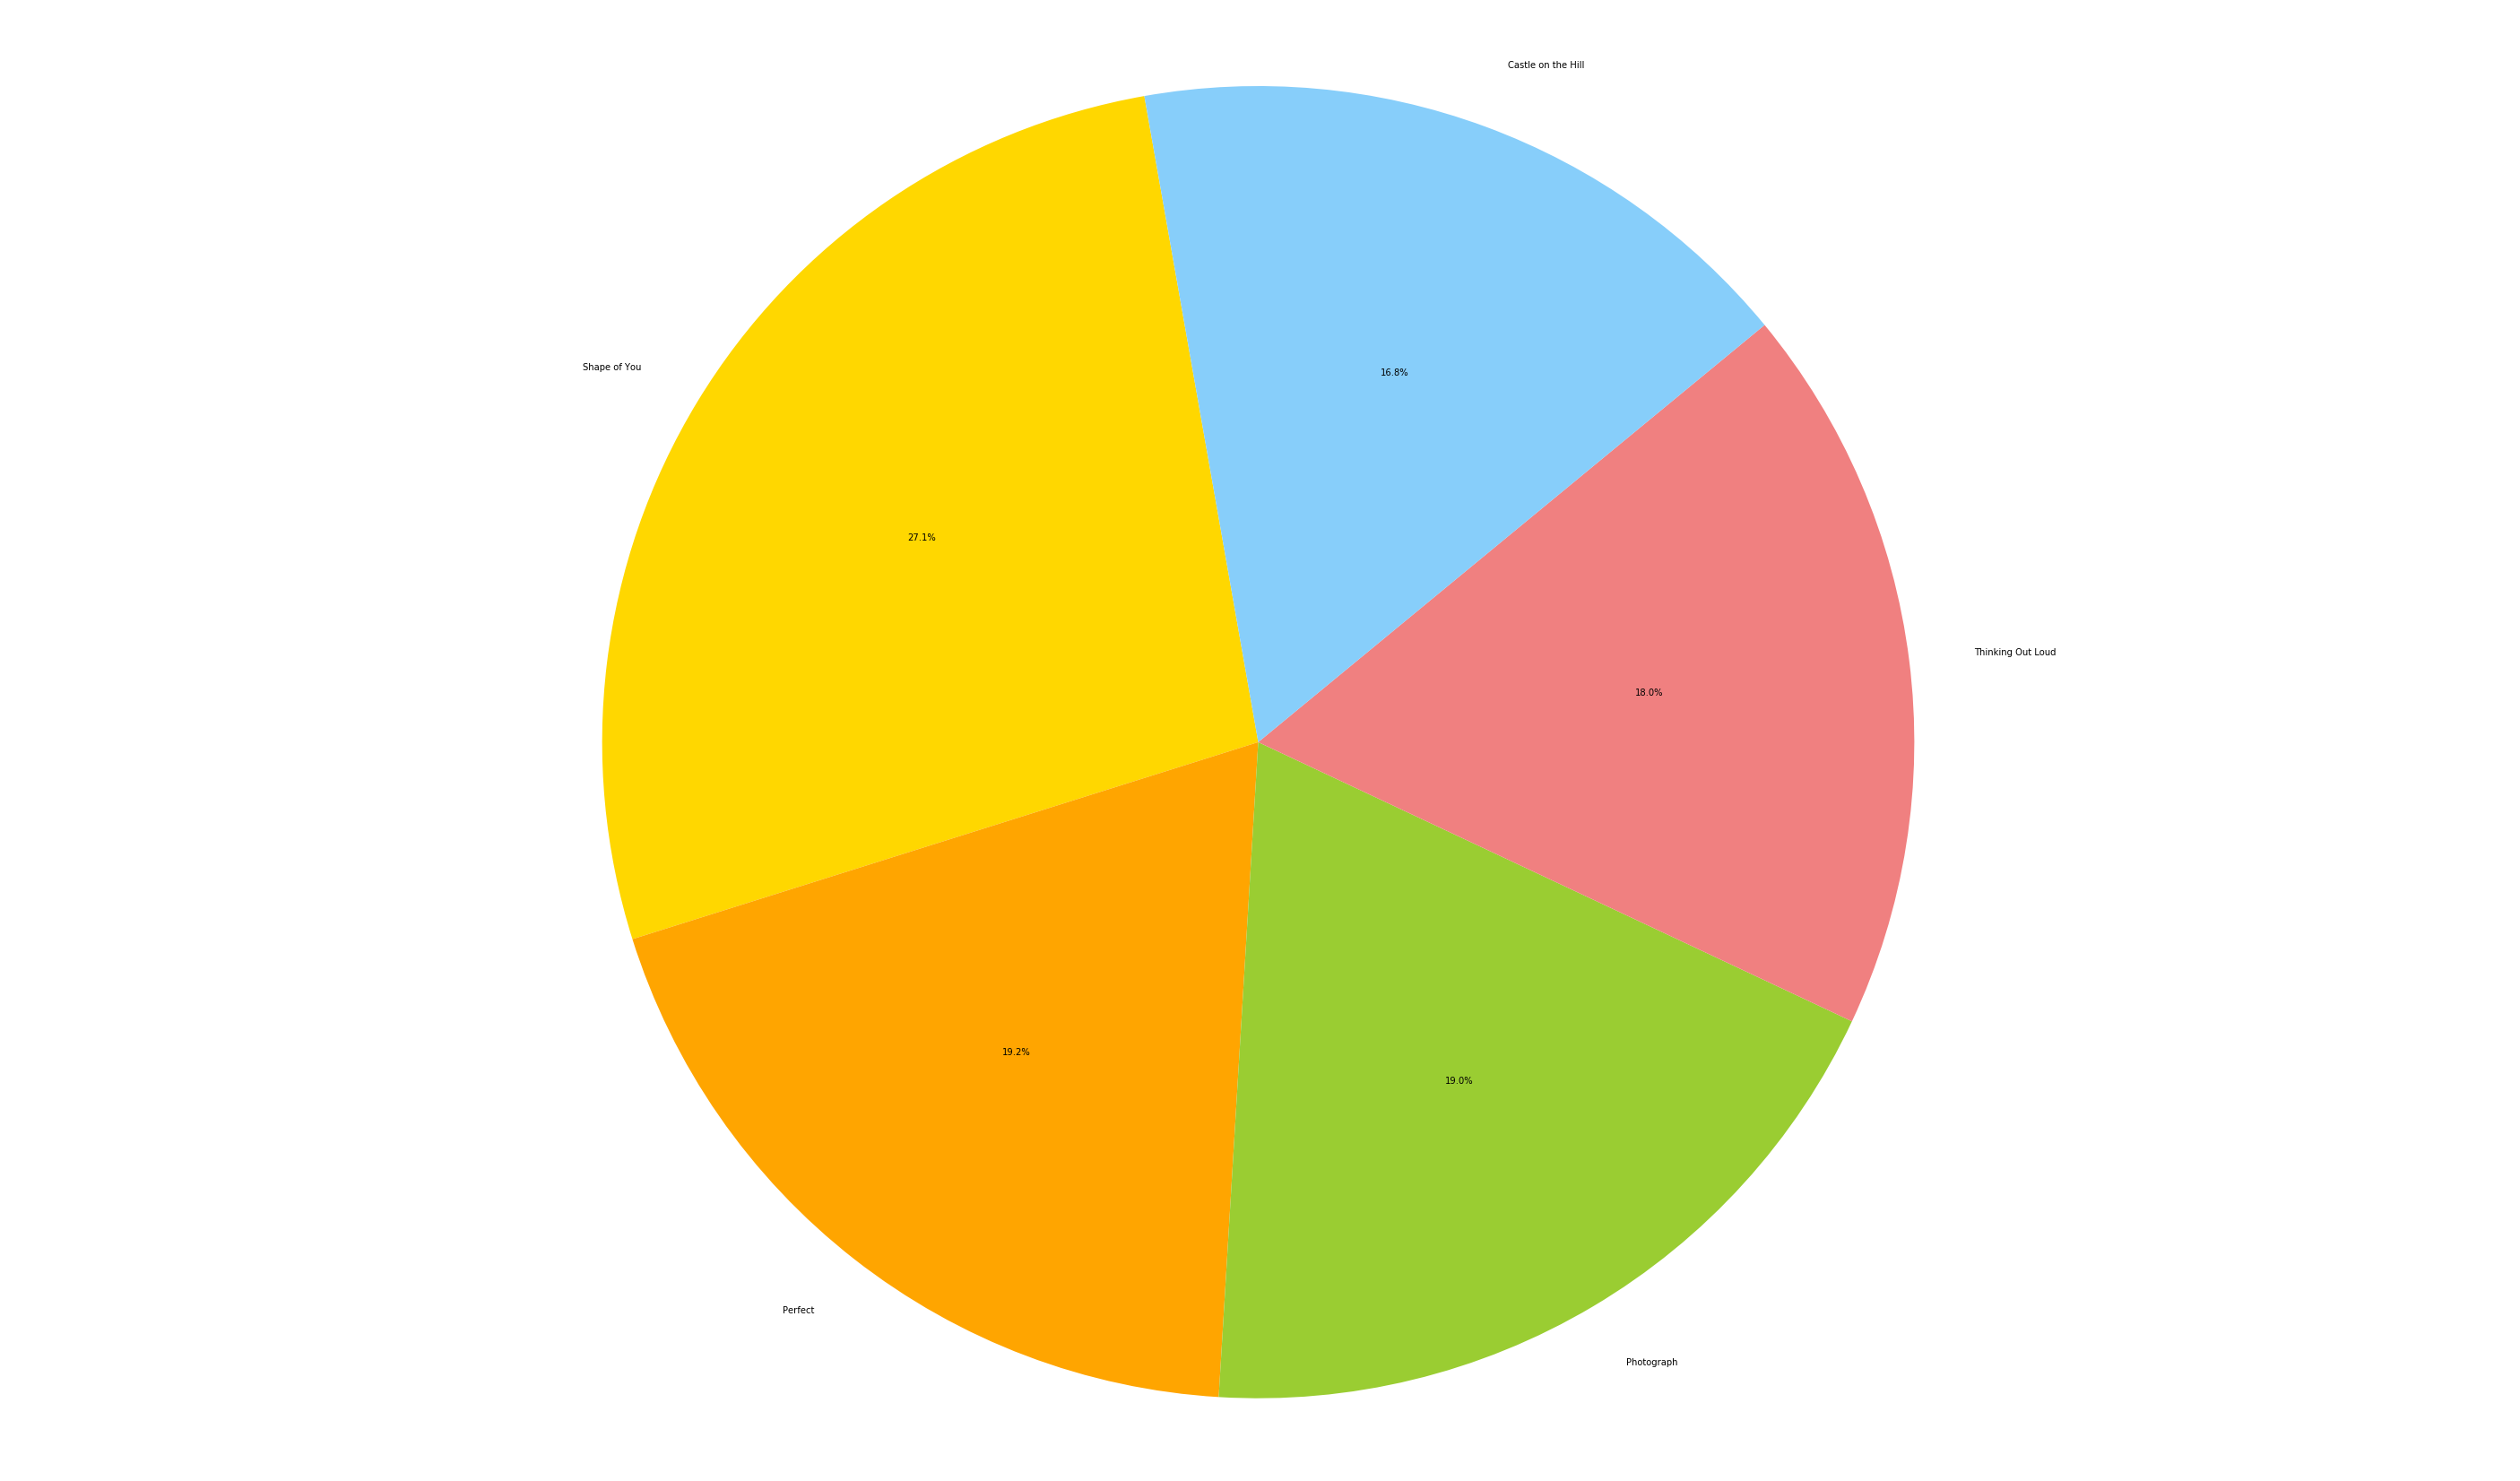

In [200]:
sheeran = data.loc[data['Artist'] == 'Ed Sheeran',:]
colors = ['gold', 'orange','yellowgreen', 'lightcoral', 'lightskyblue']
top = sheeran['Track Name'].value_counts()[:5].index.tolist()
value =sheeran['Track Name'].value_counts()[:5].values.tolist()
plt.pie(value, labels=top, colors=colors, autopct='%1.1f%%',startangle=100)
plt.axis('equal')
plt.show()

# CONCLUSION: From the analysis above I can conclude that Ed Sheeran's Shape of You is the winner and I would recommend the the songs like Humbble, Passionfruit, shape of You, despacito.

# TRAINING CLASSIFICATION ALGORITHMS ON THE DATASET

IMPORTING NECESSARY LIBRARIES AND LOADING THE DATASET

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import datasets, linear_model
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier, export_graphviz
df = pd.read_csv("C:/Users/Chandu Lad/Desktop/spotify.csv")
df = df.drop("Unnamed: 0", axis="columns")

PRINTING THE HEAD OF THE DATA

In [2]:
df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

I HAVE SPLIT THE DATA  IN THE RATIO 80:20 AS THE TESTING DATA IS ALWAYS SMALLER THAN THE TRAIN DATA. ALSO I HAVE DROPPED THE 'TARGET' FIELD FROM THE X-AXIS AND INCLUDED IT IN THE Y-AXIS AS IT IS THE DEPENDENT VARIABLE AND WE ARE TO GOING TO CLASSIFY AND PREDICT DATA DEPENDING ON THE TARGET VALUE.

In [3]:
from sklearn.model_selection import train_test_split

# drop string features (like names)
df.drop(['song_title','artist'], axis=1, inplace=True)

# the songs, "X" axis
X = df.drop(['target'], axis=1)

# and their label/class, "y" axis
y = df['target']

# split the data into train sets (X_train, y_train) and test sets (X_test, y_test).
# the testing sets are usually smaller than the training sets.
# this time I'll use 20% for testing and 80% for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# TRAINING CLASSIFICATION ALGORITHM

The classification technique is a systematic approach to build classification models from an input dat set. For example, decision tree classifiers, rule-based classifiers, neural networks, support vector machines, and naive Bayes classifiers are different technique to solve a classification problem. Each technique adopts a learning algorithm to identify a model that best fits the relationshio between the attribute set and class label of the input data. Therefore, a key objective of the learning algorithm is to build prdictive model that accurately predict the class labels of previously unkonw records.

AS THE DATA IS A CLASSIFICATION PROBLEM I HAVE TRAINED THE FOLLOWING ALGORITHMS :

1. DECISION TREE CLASSIFIER: 
   The decision tree classifiers organized a series of test questions and conditions in a tree structure. In the decision   tree, the root and internal nodes contain attribute test conditions to separate recordes that have differenT   characteristics.All the terminal node i.e "TARGET" is assigned a class lable 1 or 0.
   
2. GAUSSIAN NAIVE BAYES:
   ‘Naive Bayes‘, iS an extremely fast relative to other classification algorithms. It works on Bayes theorem of probability to predict the class of unknown data set. 
   
3. RANDOM FOREST CLASSIFIER:
    Random Forest creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.
    
ALL THESE CLASSIFICATION ALGORITHMS BELONG TO THE SKLEARN LIBRARY. SO HERE WE IMPORT THE ABOVE ALGORITHMS FROM SKLEARN, DEFINING THEM AND FITTING THEM INTO THE MODEL.    

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dtc = DecisionTreeClassifier()
nbc = GaussianNB()
rfc = RandomForestClassifier()

dtc.fit(X_train, y_train)
nbc.fit(X_train, y_train)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

NOW I AM FINDING THE ACCURACY SCORES FOR EACH ALGORITHM ND PRINTING THEM

In [5]:
tree_score = dtc.score(X_test, y_test)
naive_score = nbc.score(X_test, y_test)
random_forest_score = rfc.score(X_test, y_test)

print('Decision Tree score:', tree_score)
print('Naive Bayes score:', naive_score)
print('Random Forest score:', random_forest_score)

Decision Tree score: 0.6633663366336634
Naive Bayes score: 0.6212871287128713
Random Forest score: 0.7301980198019802


FROM THE SCORES, RANDOM FOREST WORKS BEST FOR THIS CLASSIFICATION PROBLEM.

AGAIN I AM TRYING TO PREDICT WITH ALL THE THREE ALGORITHMS FOR THE TEST DATASET

THE DATASET HAS SOME UNWANTED FIELDS WHICH NEEDS TO BE DROPPED.

In [7]:
#Training on test data
test_playlist = pd.read_csv('C:/Users/Chandu Lad/Desktop/spotify2.csv')
test_playlist.drop(['id', 'album', 'analysis_url', 'name', 'track_href', 'type', 'uri'], axis=1, inplace=True)

test_playlist_X = test_playlist.drop(['class'], axis=1)
test_playlist_y = test_playlist['class']

test_tree_score = dtc.score(test_playlist_X, test_playlist_y)
test_naive_score = nbc.score(test_playlist_X, test_playlist_y)
test_random_forest_score = rfc.score(test_playlist_X, test_playlist_y)

print('Decision Tree score:', test_tree_score)
print('Naive Bayes score:', test_naive_score)
print('Random Forest score:', test_random_forest_score)

Decision Tree score: 0.62
Naive Bayes score: 0.73
Random Forest score: 0.45


FOR THE TEST DATASET NAIVE BAYES WORKS WELL.

# PLOTTING THE ROC CURVE
ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied.

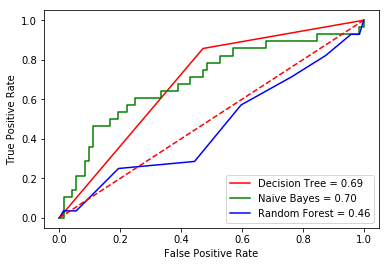

In [8]:
#Plotting ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = test_playlist['class']
decision_tree_prob = [p[1] for p in dtc.predict_proba(test_playlist_X)]
naive_bayes_prob = [p[1] for p in nbc.predict_proba(test_playlist_X)]
random_forest_prob = [p[1] for p in rfc.predict_proba(test_playlist_X)]

dt_false_pos, dt_true_pos, _ = roc_curve(actual, decision_tree_prob)
dt_auc = auc(dt_false_pos, dt_true_pos)

nb_false_pos, nb_true_pos, _ = roc_curve(actual, naive_bayes_prob)
nb_auc = auc(nb_false_pos, nb_true_pos)

rf_false_pos, rf_true_pos, _ = roc_curve(actual, random_forest_prob)
rf_auc = auc(rf_false_pos, rf_true_pos)

# plot
plt.plot(dt_false_pos, dt_true_pos, 'r', label='Decision Tree = %0.2f'% dt_auc)
plt.plot(nb_false_pos, nb_true_pos, 'g', label='Naive Bayes = %0.2f'% nb_auc)
plt.plot(rf_false_pos, rf_true_pos, 'b', label='Random Forest = %0.2f'% rf_auc)

plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion 
Random Forest is performing well for the training dataset with an accuracy of 73%

Naive Bayes is performing well for this test dataset with an accuracy 73%

# DEEP LEARNING ON THE DATASET

AFTER TRYING THE TRADITIONAL ALGORITHMS, I DECIDED TO APPLY A DEEP LEARNING ALGORITHM WHICH WOULD ACT AS A CLASSIFICATION ALGORITHM FOR THIS DATASET.

TO WALK IN THROUGH WHAT IS DEEP LEARNING AND NEURAL NETWORKS:
Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated. Neural networks help us cluster and classify. You can think of them as a clustering and classification layer on top of the data you store and manage. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on

#After reading about different neural network, i decide to apply artificial neural networkon my data.

# ANN(Artificial Neural Network)
Firstly, it helps us understand the impact of increasing / decreasing the dataset vertically or horizontally on computational time.
Secondly, it helps us understand the situations or cases where the model fits best.
Thirdly, it also helps us explain why certain model works better in certain environment or situations.

# Formulation Neural network:

INPUT LAYER --> HIDDEN LAYER --> OUTPUT LAYER

Following is the framework in which artificial neural networks (ANN) work:

STEP 1: ASSIGN RANDOM WEIGHTS TO ALL THE LINKAGES TO START THE ALGORITHM.

STEP 2: USING THE INPUT AND THE LINKAGES FIND THE ACTIVATION RATE OF OUTPUT NODES.

STEP 3: USING THE ABOVE FINDING THE ACTIVATION RATE OF OUTPUT NODES.

STEP 4: FINDING THE ERROR RATE AT THE OUPUT NODE.

STEP 5: USING THE WEIGHTS AND ERRORFOUND AT OUTPUT NODE, CASCADE DOWN THE ERROR TO HIDDEN NODES.

STEP 6: RECALIBRATE THE WEIGHTS BETWEEN HIDDEN NODE AND INPUT NODE.

STEP 7: REPEAT THE PROCESS THE CONVERGENCE CRTIRIA IS MET.

STEP 8: USING THE FINAL LINKAGE WEIGHT SCORE THE ACTIVATION RATE OF THE OUTPUT NODES.


# STATISTICAL DETAILS OF FRAMEWORK:
Logit (H1) = W(I1H1) * I1 + W(I2H1) * I2 + W(I3H1) * I3 + Constant = f

= > P(H1) = 1/(1+e^(-f))

# HOW ARE WEIGHTS RECALIBRATED:
Error @ H1 = W(H1O1)*Error@O1 + W(H1O2)*Error@O2

# IN WHAT SITUATION THE MODEL FITS WELL?
ANN is rarely used for predictive modelling. The reason being that Artificial Neural Networks (ANN) usually tries to over-fit the relationship. 

# WHAT MAKES IT A STRONG MODEL?
Artificial Neural Networks (ANN) have many different coefficients, which it can optimize. Hence, it can handle much more variability as compared to traditional models.


IMPORTING THE NECESSARY LIBRARIES

HYPERPARAMETERS:

ACTIVATION FUNCTION --> 'RELU'(INPUT LAYER), SIGMOID' (OUTPUT LAYER)

OPTIMIZER --> RMSPROP

LOSS FUNCTION --> BINARY_CROSSENTROPY

EPOCHS --> 100

BATCH SIZE --> 100

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
#importing the dataset
dataset = pd.read_csv("C:/Users/Chandu Lad/Desktop/spotify.csv")

In [11]:
print(dataset)

      Unnamed: 0  acousticness  danceability  duration_ms  energy  \
0              0      0.010200         0.833       204600   0.434   
1              1      0.199000         0.743       326933   0.359   
2              2      0.034400         0.838       185707   0.412   
3              3      0.604000         0.494       199413   0.338   
4              4      0.180000         0.678       392893   0.561   
5              5      0.004790         0.804       251333   0.560   
6              6      0.014500         0.739       241400   0.472   
7              7      0.020200         0.266       349667   0.348   
8              8      0.048100         0.603       202853   0.944   
9              9      0.002080         0.836       226840   0.603   
10            10      0.057200         0.525       358187   0.855   
11            11      0.091500         0.753       324880   0.748   
12            12      0.253000         0.603       356973   0.434   
13            13      0.366000    

GIVING THE INPUT OF FILEDS TO X AND Y AXIS

In [13]:
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 14].values

SPLITTING THE DATASET INTO TRAIN AND TEST

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

RESHAPING THE X AND Y TRAIN AND TEST SETS USING STANDARD SCALER
#STANDARDSCALER: Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using the transform method.

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1613, 13)
(404, 13)
(1613,)
(404,)


NOW LETS MAKE ARTIFICIAL NEURAL NETWORK USING KERAS MODEL
I AM USING KERAS MODEL AS IT HAS THE BEST DATA STRUCTURE WITH ORGANIZED LAYERS. FROM KERAS,I USED THE SQUENTIAL MODEL WHICHBIS THE SIMPLEST AND LINEAR STACK OF LAYERS.



In [16]:
#IMPORTING KERAS
import keras
from keras.models import Sequential #to initialize ANN
from keras.layers import Dense      # to create layers in ANN model

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


BUiILDING THE ANN MODEL

In [17]:
#Initialising ANN
#Defining ANN as a squence of layers
classifier = Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(7, activation='relu', input_shape=(13,), name = 'DenseLayer1'))
#Adding 2nd hidden layer
classifier.add(Dense(7, activation='relu', name = 'DenseLayer2'))
#Adding the output layer
classifier.add(Dense(1, activation='sigmoid', name = 'DenseLayer3'))
#Compliling the ANN model
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the model
classifier.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
1613/1613 [==============================] - 1s 854us/step - loss: 0.7726 - acc: 0.4383
Epoch 2/100
1613/1613 [==============================] - 0s 39us/step - loss: 0.7481 - acc: 0.4476
Epoch 3/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.7313 - acc: 0.4588
Epoch 4/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.7183 - acc: 0.4644
Epoch 5/100
1613/1613 [==============================] - 0s 10us/step - loss: 0.7077 - acc: 0.4817
Epoch 6/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.6991 - acc: 0.5028
Epoch 7/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.6919 - acc: 0.5263
Epoch 8/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.6853 - acc: 0.5518
Epoch 9/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.6795 - acc: 0.5722
Epoch 10/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.6746 - acc: 0.5890
Epoch 11

1613/1613 [==============================] - 0s 19us/step - loss: 0.5154 - acc: 0.7576
Epoch 84/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.5149 - acc: 0.7595
Epoch 85/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.5140 - acc: 0.7576
Epoch 86/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.5133 - acc: 0.7595
Epoch 87/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.5126 - acc: 0.7595
Epoch 88/100
1613/1613 [==============================] - 0s 19us/step - loss: 0.5122 - acc: 0.7576
Epoch 89/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.5116 - acc: 0.7564
Epoch 90/100
1613/1613 [==============================] - 0s 39us/step - loss: 0.5112 - acc: 0.7613
Epoch 91/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.5104 - acc: 0.7632
Epoch 92/100
1613/1613 [==============================] - 0s 29us/step - loss: 0.5102 - acc: 0.7626
Epoch 93/100


# TRYING THE ANN MODEL WITH DIFFERENT HYPERPARAMETERS

Here i have passed the following hyperparameters.

ACTIVATION FUNCTION --> 'TANH'(INPUT LAYER), SIGMOID (OUTPUT LAYER)

OPTIMIZER --> RMSPROP

LOSS FUNCTION --> BINARY_CROSSENTROPY

EPOCHS --> 100

BATCH SIZE --> 100


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
dataset = pd.read_csv("C:/Users/Chandu Lad/Desktop/spotify.csv")

In [20]:
X = dataset.iloc[:, 1:14].values
y = dataset.iloc[:, 14].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1613, 13)
(404, 13)
(1613,)
(404,)


In [35]:
import keras
from keras.models import Sequential #to initialize ANN
from keras.layers import Dense      # to create layers in ANN model
from keras import optimizers

In [36]:
#Initialising ANN
#Defining ANN as a squence of layers
classifier = Sequential()
#Adding the input layer and the first hidden layer
classifier.add(Dense(7, activation='tanh', input_shape=(13,), name = 'DenseLayer1'))
#Adding 2nd hidden layer
classifier.add(Dense(7, activation='tanh', name = 'DenseLayer2'))
#Adding the output layer
classifier.add(Dense(1, activation='sigmoid', name = 'DenseLayer3'))
#Compliling the ANN model
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
#Fitting the model
classifier.fit(X_train, y_train, epochs=100, batch_size=100)

Epoch 1/100
1613/1613 [==============================] - 1s 397us/step - loss: 0.7029 - acc: 0.4941
Epoch 2/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6935 - acc: 0.5022
Epoch 3/100
1613/1613 [==============================] - 0s 25us/step - loss: 0.6939 - acc: 0.4898
Epoch 4/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6936 - acc: 0.5059
Epoch 5/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6938 - acc: 0.4910
Epoch 6/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6935 - acc: 0.5046
Epoch 7/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6936 - acc: 0.5015
Epoch 8/100
1613/1613 [==============================] - 0s 25us/step - loss: 0.6936 - acc: 0.5009
Epoch 9/100
1613/1613 [==============================] - 0s 42us/step - loss: 0.6938 - acc: 0.4873
Epoch 10/100
1613/1613 [==============================] - 0s 25us/step - loss: 0.6937 - acc: 0.4898
Epoch 11

1613/1613 [==============================] - 0s 28us/step - loss: 0.6938 - acc: 0.4923
Epoch 84/100
1613/1613 [==============================] - 0s 24us/step - loss: 0.6935 - acc: 0.5022
Epoch 85/100
1613/1613 [==============================] - 0s 25us/step - loss: 0.6934 - acc: 0.5077
Epoch 86/100
1613/1613 [==============================] - 0s 30us/step - loss: 0.6940 - acc: 0.4892
Epoch 87/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6934 - acc: 0.4898
Epoch 88/100
1613/1613 [==============================] - 0s 25us/step - loss: 0.6939 - acc: 0.4972
Epoch 89/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6935 - acc: 0.4985
Epoch 90/100
1613/1613 [==============================] - 0s 22us/step - loss: 0.6940 - acc: 0.4706
Epoch 91/100
1613/1613 [==============================] - 0s 23us/step - loss: 0.6935 - acc: 0.4910
Epoch 92/100
1613/1613 [==============================] - 0s 30us/step - loss: 0.6938 - acc: 0.4761
Epoch 93/100


This shows that activation function tanh in the hidden layers and sigmoid in the output layer works well with a accuracy of 0.5059

# CONCLUSION
1. AFTER THE EDA AND THE TRAINING OF BOTH TRADITIONAL AND NEURAL NETWORKS I HAVE THOROUGHLY UNDERSTOOD THE CONCEPTS.

2. I HAVE IMPLEMENTED WHATEVER COVERS THE PORTION FOR THE COURSE.

3. FOR ANN, THE ACCURACY CHANGES WITH DIFFERENT PARAMETERS, HERE RELU WORKS BETTER THAN TANH, AS THE EPOCHS INCREASES THE ACCURACY ALSO INCREASES, MORE THE LAYERS IT RESULTS IN OVERFITTING.

4. IN THE CLASSIFICATION ALGORITHM, RANDOM FOREST FOREST WORKED WELL THE THIS DATASET. THOUGH EVERY ALGORITHM HAS ITS OWN FEATURES IT WORKS ACCORDING TO ENVIRONMENT AND THE PROBLEM.

5. FROM THE EXPLORATORY ANALYSIS, I CAN CONCLUDE FEATURE LIKE DANCEABILITY , ENERGY ARE MORE RESPONSIBLE FOR THE LIKNESS OF THE SONG.

# LICENSING

<a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/3.0/us/88x31.png" /></a><br>The text in the document by RUTA LAD is licensed under <a rel="license" href="http://creativecommons.org/licenses/by/3.0/us/">Creative Commons Attribution 3.0 United States License</a>.<br><br>


The code in the document by RUTA LAD is licensed under the MIT License https://opensource.org/licenses/MIT